In [1]:
import spacy
import pandas as pd

import numpy as np
import tqdm
import os

from glob import glob
from spacy import displacy

In [2]:
from spacy.lang.pl.stop_words import STOP_WORDS

In [3]:
nlp = spacy.load('pl_spacy_model')

In [4]:
base_dir = '../data/dane_slowa_klucze/'

In [5]:
class ArticlesOrganizer:
    def __init__(self, base_dir):
        self.base_dir = base_dir
        self.articles_header = ['id', 'site', 'topic', 'file_name']
        self.list_of_sites = self.get_list_of_sites()
        self.list_of_topics = self.get_list_of_topics()
#         self.articles = self.get_articles()
        
    def get_list_of_sites(self):
        return [
            site 
            for site in sorted(os.listdir(self.base_dir)) if site != '.DS_Store'
        ]
    
    def get_list_of_topics(self):
        return sorted(os.listdir(self.base_dir + self.list_of_sites[0]))
    
    def get_articles(self):
        articles = [
            [site, topic, base_dir + site + '/' + topic + '/art/' + article] 
            for site in self.list_of_sites 
            for topic in self.list_of_topics
            for article in os.listdir(self.base_dir + site + '/' + topic + '/art/')
        ]
        
        for counter, article in enumerate(articles):
            article.insert(0, counter + 1) 
        articles.insert(0, self.articles_header)
        
        return np.asarray(articles)

In [6]:
articles = ArticlesOrganizer(base_dir).get_articles()

In [7]:
metadata = pd.DataFrame(articles[1:], columns = articles[0])

In [18]:
for _, values in metadata[metadata.site == 'interia'].iterrows():
    print(values.file_name)

../data/dane_slowa_klucze/interia/CEFTA/art/interia_8.txt
../data/dane_slowa_klucze/interia/CEFTA/art/interia_5.txt
../data/dane_slowa_klucze/interia/CEFTA/art/interia_4.txt
../data/dane_slowa_klucze/interia/CEFTA/art/interia_6.txt
../data/dane_slowa_klucze/interia/CEFTA/art/interia_7.txt
../data/dane_slowa_klucze/interia/CEFTA/art/interia_3.txt
../data/dane_slowa_klucze/interia/CEFTA/art/interia_2.txt
../data/dane_slowa_klucze/interia/CEFTA/art/interia_1.txt
../data/dane_slowa_klucze/interia/CETA/art/interia_81.txt
../data/dane_slowa_klucze/interia/CETA/art/interia_95.txt
../data/dane_slowa_klucze/interia/CETA/art/interia_42.txt
../data/dane_slowa_klucze/interia/CETA/art/interia_56.txt
../data/dane_slowa_klucze/interia/CETA/art/interia_57.txt
../data/dane_slowa_klucze/interia/CETA/art/interia_43.txt
../data/dane_slowa_klucze/interia/CETA/art/interia_94.txt
../data/dane_slowa_klucze/interia/CETA/art/interia_80.txt
../data/dane_slowa_klucze/interia/CETA/art/interia_96.txt
../data/dane_s

In [19]:
df_interia = []
for _, row in metadata[metadata.site == 'interia'].iterrows():
    try:
        filename = row.file_name
        print(row.topic)
        sentences = pd.read_csv(filename, sep='\n\r', header=None)
        article = " ".join(sentences[0])
        df_interia.append({
            'content': article
        })
    except Exception as e:
        print(e)
        continue

CEFTA
CEFTA
CEFTA
CEFTA
CEFTA
CEFTA
CEFTA
CEFTA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
CETA
GATT
GATT
GATT
GATT
GATT
GATT
GATT
GATT
GATT
GATT
GATT
GATT
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
NAFTA
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTIP
TTI

In [10]:
df_interia = pd.DataFrame(df_interia, index=range(0, len(df_interia)))

In [11]:
df_interia

,content
0,Wicepremier i minister gospodarki Janusz Stein...
1,Polska zajmie dzisiaj ostrożne stanowisko w de...
2,O 8 groszy więcej płacimy od dziś za litr benz...
3,"""Autostrada i tabaka dla Kaszuba i Polaka"" - z..."
4,"Określenie ""jugosfera"" (Yugosphere) pojawiło s..."
5,"1375 - zmarł Giovanni Boccaccio, włoski pisarz..."
6,W wyniku zakończenia procesu liberalizacji ceł...
7,Aktywność gospodarcza W I kwartale 2000 roku p...
8,Na wprowadzeniu umowy o wolnym handlu z Kanadą...
9,"Umowa CETA osłabi unijną zasadę ostrożności, j..."


In [12]:
# %%capture --no-display
entities_column = []
lemmas_column = []
heads_column = []
heads_lemmatized_column = []
for idx, article in enumerate(tqdm.tqdm(df_interia.content, position=0, leave=True)):
    parsed = nlp(article)
    entities = []
    lemmas = []
    heads = []
    for sentence in parsed.sents:
        entities.append(sentence.ents)
#         displacy.render(sentence, style = 'dep', options = {"compact": True})
#         displacy.render(sentence, style="ent")
        sent_heads = []
        for tok in sentence:
            sent_heads.append(tok.head)
        lemmas.append(sentence.lemma_)
        heads += sent_heads
#         break
   
    entities_column.append(list(filter(None, entities)))
    lemmas_column.append(lemmas)
    heads_column.append(heads)
    heads_lemmatized_column.append(list(
        sent_heads.lemma_
        for sent_heads in heads
    ))
df_interia['lemmatized'] = lemmas_column
df_interia['named_entities'] = entities_column
df_interia['heads'] = heads_column
df_interia['heads_lemmatized'] = heads_lemmatized_column
df_interia['lemmatized_sent'] = [
    " ".join(df_interia.iloc[idx].lemmatized)
    for idx in range(len(df_interia))
]

100%|██████████| 520/520 [01:41<00:00,  8.08it/s]


In [13]:
from collections import Counter

In [14]:
Counter(df_interia.iloc[0].heads_lemmatized)

Counter({'powiedzieć': 13,
         'minister': 8,
         'wicepremier': 1,
         'janusz': 2,
         'zadowolony': 4,
         'wyrazić': 13,
         'zainteresowanie': 3,
         'fabryka': 16,
         'daewoo-fso': 3,
         'motor': 3,
         'warszawa': 4,
         'producent': 4,
         'jeden': 2,
         'przedstawić': 14,
         'jutro': 4,
         'wierzyciel': 7,
         'daewoo': 8,
         'co': 2,
         'rezultat': 2,
         'general': 8,
         'rozmowy': 3,
         'gm': 5,
         'sprzedaż': 10,
         'w': 5,
         'koncern': 7,
         'być': 4,
         'Polska': 2,
         'poinformować': 10,
         'zapas': 3,
         'produkcja': 9,
         'część': 11,
         'serwis': 3,
         'zamienny': 3,
         'mieć': 19,
         'przestój': 2,
         'działanie': 4,
         'wpływ': 2,
         'spółka': 2,
         'Krystyn': 4,
         'rzeczniczka': 4,
         'chciałbym': 5,
         'zwrócić': 3,
         'list'

In [15]:
df_interia

,content,lemmatized,named_entities,heads,heads_lemmatized,lemmatized_sent
0,Wicepremier i minister gospodarki Janusz Stein...,[wicepremier i minister gospodarka janusz stei...,"[[(Janusz, Steinhoff), (Motor, SA), (Warszawie...","[powiedział, minister, Wicepremier, minister, ...","[powiedzieć, minister, wicepremier, minister, ...",wicepremier i minister gospodarka janusz stein...
1,Polska zajmie dzisiaj ostrożne stanowisko w de...,[polska zająć dzisiaj ostrożny stanowisko w de...,"[[(Polska), (Unii, Europejskiej), (GMOs), (Jer...","[zajmie, poinformował, zajmie, stanowisko, zaj...","[zająć, poinformować, zająć, stanowisko, zająć...",polska zająć dzisiaj ostrożny stanowisko w deb...
2,O 8 groszy więcej płacimy od dziś za litr benz...,[o 8 grosze więcej płacić od dziś za litr benz...,"[[(Rafinerii, Gdańskiej)], [(Polskiego, Koncer...","[groszy, groszy, więcej, płacimy, płacimy, dzi...","[grosze, grosze, więcej, płacić, płacić, dziś,...",o 8 grosze więcej płacić od dziś za litr benzy...
3,"""Autostrada i tabaka dla Kaszuba i Polaka"" - z...","["" autostrada i tabaka dla Kaszub i polak "" - ...","[[(Kaszuba), (Polaka), (Gdańsku), (Pomorza)], ...","[Autostrada, wyruszyli, tabaka, Autostrada, Ka...","[autostrada, wyruszyć, tabaka, autostrada, Kas...",""" autostrada i tabaka dla Kaszub i polak "" - z..."
4,"Określenie ""jugosfera"" (Yugosphere) pojawiło s...","[określenie "" jugosfera "" ( yugosphere ) pojaw...","[[(Yugosphere)], [(2009), (Wielkiej, Brytanii)...","[pojawiło, jugosfera, Określenie, jugosfera, Y...","[pojawić, jugosfera, określenie, jugosfera, yu...","określenie "" jugosfera "" ( yugosphere ) pojawi..."
5,"1375 - zmarł Giovanni Boccaccio, włoski pisarz...","[1375 - zemrzeć giovanni boccaccio , włoski pi...","[[(1375), (Giovanni, Boccaccio), (włoski), (wł...","[zmarł, zmarł, zmarł, zmarł, Giovanni, pisarz,...","[zemrzeć, zemrzeć, zemrzeć, zemrzeć, giovanni,...","1375 - zemrzeć giovanni boccaccio , włoski pis..."
6,W wyniku zakończenia procesu liberalizacji ceł...,[w wynik zakończenie proces liberalizacja cło ...,"[[(2001, roku)], [(Unii, Europejskiej)], [(Pol...","[zakończenia, W, obowiązują, zakończenia, proc...","[zakończenie, w, obowiązywać, zakończenie, pro...",w wynik zakończenie proces liberalizacja cło n...
7,Aktywność gospodarcza W I kwartale 2000 roku p...,[aktywność gospodarczy w i kwartał 2000 rok pr...,"[[(2000, roku), (III)], [(1999, roku)], [(1999...","[zwiększył, Aktywność, kwartale, kwartale, Akt...","[zwiększyć, aktywność, kwartał, kwartał, aktyw...",aktywność gospodarczy w i kwartał 2000 rok pro...
8,Na wprowadzeniu umowy o wolnym handlu z Kanadą...,[na wprowadzenie umowa o wolny handel z kanada...,"[[(Kanadą), (Katowicach), (PSL), (Władysław, K...","[wprowadzeniu, stracą, wprowadzeniu, handlu, h...","[wprowadzenie, stracić, wprowadzenie, handel, ...",na wprowadzenie umowa o wolny handel z kanada ...
9,"Umowa CETA osłabi unijną zasadę ostrożności, j...","[umowa cet osłabić unijny zasada ostrożność , ...","[[(CETA), (europejskiej)], [(CETA), (Interią),...","[osłabi, Umowa, alarmują, zasadę, osłabi, zasa...","[osłabić, umowa, alarmować, zasada, osłabić, z...","umowa cet osłabić unijny zasada ostrożność , j..."


## Extractive summarization using TF-IDF & cosine similarity

In [16]:
class SummarizationUtils:
    def __init__(self, sentence_length_threshold=30):
        self.sentence_length_threshold = sentence_length_threshold
        
    def filter_short_sentences(self, sentences):
        return [
            sentence for sentence in sentences
            if len(sentence) > self.sentence_length_threshold
        ]

In [17]:
utils = SummarizationUtils()

In [18]:
def pipeline(article_sentences, original_percentage=0.25):
    filtered_sentences = utils.filter_short_sentences(sentences=article_sentences)
    return filtered_sentences

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

cv = CountVectorizer(
    token_pattern=r"(?u)\b\w+\b",
    stop_words=STOP_WORDS,
)
WC_vector=cv.fit_transform(df_interia.lemmatized_sent)
tfidf_transformer = TfidfTransformer(smooth_idf=False, norm=None)
TFIDFmatrix = tfidf_transformer.fit_transform(WC_vector)

In [20]:
vectorizer = TfidfVectorizer(stop_words=STOP_WORDS)
vectors = vectorizer.fit_transform(df_interia.lemmatized_sent)

In [21]:
vectors.data, vectors.shape

(array([0.02105505, 0.03669676, 0.03274351, ..., 0.09365269, 0.09981999,
        0.19963998]), (520, 15213))

In [22]:
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
dense_df = pd.DataFrame(denselist, columns=feature_names)

In [23]:
dense_df.head()

,00,000,005,0089,01,014,0140,018,02,0229,...,żywioł,żywnie,żywnościowy,żywność,żywo,żywość,żywy,żyć,żądanie,żądać
0,0.0,0.0,0.0,0.0,0.033397,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.051324,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
article_sentences = pipeline(df_interia.iloc[0].lemmatized)

In [25]:
df_idf = pd.DataFrame(vectorizer.idf_, index=feature_names, columns=["idf_weights"])

In [26]:
df_idf.sort_values(by=['idf_weights'], ascending=False)

,idf_weights
montreal,6.562603
obcięciem,6.562603
wymuszaniu,6.562603
obando,6.562603
obchód,6.562603
obcinać,6.562603
obciąć,6.562603
obcięcia,6.562603
wymrzeć,6.562603
obrończyni,6.562603


In [27]:
vectorizer.transform(article_sentences)

<21x15213 sparse matrix of type '<class 'numpy.float64'>'
	with 313 stored elements in Compressed Sparse Row format>

In [28]:
sentence_tfidfs = []
for idx, sentence in enumerate(article_sentences):
    sentence_tfidfs.append(vectorizer.transform([sentence]))

In [65]:
article_sentences

['wicepremier i minister gospodarka janusz steinhoff powiedzieć , że byłby zadowolony , gdyby zainteresowanie fabryka daewoo-fso motor sa w warszawa wyrazić jeden z producent koreański .',
 'tymczasem prawdopodobnie już jutro wierzyciel daewoo motor co . przedstawić rezultat rozmowy z general motors ( gm ) w sprawa sprzedaż południowokoreańskiego koncern amerykan .',
 'a w Polska być zapas część do produkcja oraz część zamienny do serwis , a przestój w koreański fabryka koncern nie będą mieć wpływ na działanie polski spółka - poinformować Krystyn danilczyk , rzeczniczka daewoo-fso .',
 '" chciałbym , jako minister gospodarka , aby zainteresowanie ten fabryka wyrazić jeden z producent koreański .',
 'zwrócić się nawet z stosowny list i zaproszenie do rozmowy " - powiedzieć minister gospodarka janusz steinhoff .',
 'zainteresowanie polski fabryka daewoo w warszawa i lublin nie wyrazić general motors , który negocjować kupno koreański aktywa daewoo .',
 'według oficjalny informacja zainte

In [54]:
list(zip(vectorizer.transform([sentence]).indices, vectorizer.transform([sentence]).data))

[(13035, 0.4473839249059082),
 (12249, 0.18877438831567675),
 (8826, 0.26122240293188853),
 (6832, 0.13219165752083814),
 (6261, 0.1862544104635817),
 (6038, 0.3945505919616677),
 (3489, 0.4693117392896524),
 (3201, 0.15473170320761387),
 (2036, 0.4693117392896524),
 (2020, 0.15391648273685674)]

In [79]:
def _score_sentences(tf_idfs):
    scores = []
    for tf_idf in tf_idfs:
        length = len(tf_idf.data)
        scores.append(np.sum(tf_idf.data) / length)
    return scores

In [88]:
import heapq

In [109]:
heads = [
    art[:10]
    for art in article_sentences
]

In [110]:
scores = dict(zip(heads, _score_sentences(sentence_tfidfs)))

In [123]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

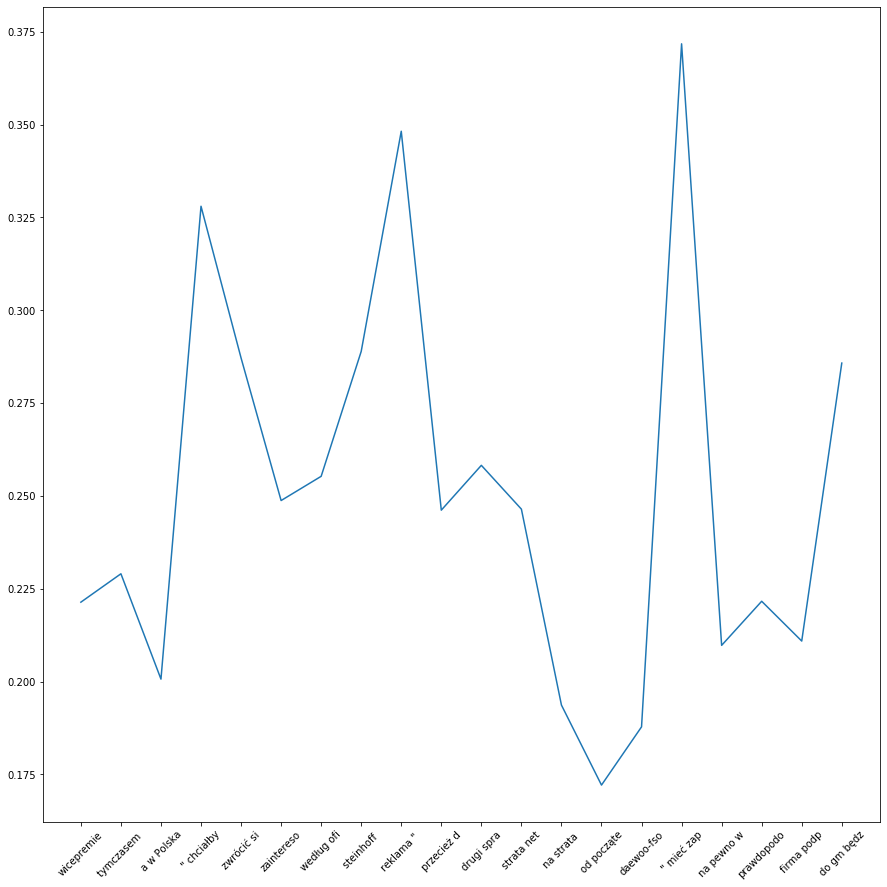

In [133]:
plt.figure(figsize=(15,15))
plt.plot(list(scores.keys()), list(scores.values()))
plt.xticks(rotation=45)

In [115]:
def _get_top_sentences(sentences, scores, percentage=.25):
    no_of_sentences_in_summary = np.ceil(len(sentences) * percentage).astype(int)
    sentence_counter = 0
    article_summary = ''
    sent_index = 10
    sentences_in_summary = heapq.nlargest(no_of_sentences_in_summary, scores)
    for sentence in sentences:
        if sentence[:sent_index] in sentences_in_summary:
            article_summary += " " + sentence
            sentence_counter += 1

    return article_summary

In [116]:
_get_top_sentences(article_sentences, scores)

' wicepremier i minister gospodarka janusz steinhoff powiedzieć , że byłby zadowolony , gdyby zainteresowanie fabryka daewoo-fso motor sa w warszawa wyrazić jeden z producent koreański . tymczasem prawdopodobnie już jutro wierzyciel daewoo motor co . przedstawić rezultat rozmowy z general motors ( gm ) w sprawa sprzedaż południowokoreańskiego koncern amerykan . zwrócić się nawet z stosowny list i zaproszenie do rozmowy " - powiedzieć minister gospodarka janusz steinhoff . zainteresowanie polski fabryka daewoo w warszawa i lublin nie wyrazić general motors , który negocjować kupno koreański aktywa daewoo . według oficjalny informacja zainteresować daewoo-fso móc być koreański rywal daewoo motor , koncern motoryzacyjny hyundai . strata netto daewoo-fso motor sa wzrość w 2000 rok do 2,03 miliard złoty z 28 milion złoty w 1999 rok . tymczasem prawdopodobnie już jutro wierzyciel daewoo motor co . przedstawić rezultat rozmowy z general motors ( gm ) w sprawa sprzedaż południowokoreańskiego k

In [66]:
vectorizer.transform([sentence]).data

array([0.44738392, 0.18877439, 0.2612224 , 0.13219166, 0.18625441,
       0.39455059, 0.46931174, 0.1547317 , 0.46931174, 0.15391648])

In [37]:
sentence_dists = [
    cosine_distances(vectors, sentence_tfidf)
    for sentence_tfidf in sentence_tfidfs
]

In [38]:
cosine_distances(vectors, sentence_tfidfs[0])

array([[0.36930121],
       [0.98007272],
       [0.99339107],
       [0.97272087],
       [0.99392055],
       [0.99694092],
       [0.95458855],
       [0.98866714],
       [0.98214728],
       [0.99675403],
       [0.97802504],
       [0.99440211],
       [0.99793533],
       [0.9933683 ],
       [1.        ],
       [0.99191535],
       [1.        ],
       [0.98743884],
       [0.9919873 ],
       [0.99190263],
       [1.        ],
       [0.95945967],
       [1.        ],
       [0.99593286],
       [0.98453724],
       [0.98773669],
       [1.        ],
       [0.9974503 ],
       [0.99454525],
       [0.98859864],
       [1.        ],
       [0.99809492],
       [0.99690817],
       [0.98689564],
       [0.99661416],
       [0.99644436],
       [0.98748266],
       [0.99447141],
       [0.99157313],
       [0.99599073],
       [0.95692468],
       [0.94256836],
       [0.99534486],
       [0.99524634],
       [0.97206463],
       [0.98455374],
       [0.97510358],
       [0.987

In [39]:
sentence_dists[0].shape

(520, 1)

In [40]:
result = vectorizer.transform([article_sentences[-1]])

In [41]:
result.data

array([0.44738392, 0.18877439, 0.2612224 , 0.13219166, 0.18625441,
       0.39455059, 0.46931174, 0.1547317 , 0.46931174, 0.15391648])

In [42]:
def top_words_tf_idf(idx):
    text = article_sentences[idx]
    result = vectorizer.transform([text])
    order = np.argsort(result.data)[::-1]
    
    df = pd.DataFrame(result.data[order], list(map(vectorizer.get_feature_names().__getitem__, result.indices[order])), columns=['tf-idf'])
    return df.sort_values(by='tf-idf',ascending=False)

In [43]:
top_words_tf_idf(-1)

,tf-idf
daewoo,0.469312
gm,0.469312
wierzyciel,0.447384
motor,0.394551
pozostały,0.261222
udział,0.188774
należeć,0.186254
firma,0.154732
część,0.153916
nowy,0.132192
